#### Dependencies

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import gmaps
import seaborn as sns
from config import gkey
import matplotlib.pyplot as plt
plt.rcdefaults()
sns.set()
gmaps.configure(api_key=gkey)

### Import CVS

In [5]:
holiday_data = pd.read_csv("retail_holidays.csv")
chi_crime_data = pd.read_csv("Chicago_City/Crimes_2016_raw.csv.gz")
chi_crime_sample_data = pd.read_csv("Chicago_City/Crimes_2016_raw.csv.gz")
nyc_holiday_data = pd.read_csv("NYC/NYPD_Holiday_crimes.csv")
nyc_data = pd.read_csv("NYC/NYC_2016_full.csv")

### Do the holidays have an impact on crime location?

In [6]:
# Determine if date is a holiday


def check_if_holiday(d):
    result = False
    for h in holiday_df['2016 Year']:
        if d == h:
            result = True
    return result

### Create DataFrame

In [7]:
chi_crime_df = pd.DataFrame(chi_crime_data)
chi_crime_sample_df = pd.DataFrame(chi_crime_sample_data)
nyc_holiday_df = pd.DataFrame(nyc_holiday_data)
nyc_df = pd.DataFrame(nyc_data)

### Create Holidays and Non Holidays DataFrames

In [8]:
holiday_df = pd.DataFrame(holiday_data)

In [9]:
chi_crime_df['Is_Holiday'] = chi_crime_df['Date'].apply(check_if_holiday)

chi_crime_df['Is_Holiday_int'] = chi_crime_df['Date'].apply(
    lambda h: int(check_if_holiday(h)))

In [10]:
nyc_df['Is_Holiday'] = nyc_df['CMPLNT_FR_DT'].apply(check_if_holiday)

nyc_df['Is_Holiday_int'] = nyc_df['CMPLNT_FR_DT'].apply(
    lambda h: int(check_if_holiday(h)))

In [11]:
chi_holidays_df = chi_crime_df[(chi_crime_df.Is_Holiday_int > 0)]

chi_non_holidays_df = chi_crime_df[(chi_crime_df.Is_Holiday_int < 1)]

In [12]:
nyc_crime_holidays_df = nyc_df[(nyc_df.Is_Holiday_int > 0)]

nyc_crime_non_holidays_df = nyc_df[(nyc_df.Is_Holiday_int < 1)]

### Normalize NYC Location Description

In [13]:
def check_if_cat(c):
    result = False
    for l in nyc_crime_holidays_df["PREM_TYP_DESC"]:
        if c == l:
            result = True
    return result

In [14]:
nyc_crime_non_holidays_df['Is_Location_Cat'] = nyc_crime_non_holidays_df["PREM_TYP_DESC"].apply(
    check_if_cat)

nyc_crime_non_holidays_df['Is_Location_Cat_int'] = nyc_crime_non_holidays_df["PREM_TYP_DESC"].apply(
    lambda l: int(check_if_cat(l)))

nyc_non_holidays_df =  nyc_crime_non_holidays_df[(nyc_crime_non_holidays_df.Is_Location_Cat_int > 0)]

C:\tools\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\tools\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Normalize Chicago Holiday data

In [15]:
chi_normal = chi_crime_df

In [16]:
is_hol = chi_normal['Is_Holiday'] == True
chi_normal_try = chi_normal[is_hol]
chi_normal =chi_normal.append([chi_normal_try]*20,ignore_index=True)

In [17]:
chi_holidays_normal =  chi_normal[(chi_normal.Is_Holiday_int > 0)]

In [18]:
chi_holiday_normal_df = pd.DataFrame(chi_holidays_normal[['Date', 'Primary Type','Latitude','Longitude','Location','Count Count Per Location','Is_Holiday','Is_Holiday_int' ]])

### Create Chicago Holiday Heat map

In [19]:
holiday_crimes = chi_holiday_normal_df[["Latitude", "Longitude"]]

In [20]:
locations = holiday_crimes 
fig = gmaps.figure(map_type='HYBRID', zoom_level= 12, center = (41.883500187, -87.627876698),
        layout={
       
        'padding': '3px',
        'border': '1px solid black'}, tilt=45 )
heatmap_layer = gmaps.heatmap_layer(locations)


fig.add_layer(heatmap_layer)





fig



Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='3px'))

### Create Chicago Non Holiday Heat map

In [21]:
non_holiday_crimes = chi_non_holidays_df[["Latitude", "Longitude"]]

In [22]:
locations = non_holiday_crimes 
fig = gmaps.figure(map_type='HYBRID', zoom_level= 12, center = (41.883500187, -87.627876698),
        layout={
       
        'padding': '3px',
        'border': '1px solid black'}, tilt=45 )
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='3px'))

## Sample data set using symbol marker map

* An overlapping map showing shopping holiday crime and non-shopping holiday crime will give a better visual for spotting any trends if they exist.

In [23]:
chi_crime_sample = chi_crime_df.iloc[0:2000, :]

In [24]:
chi_crime_sample['Is_Holiday'] = chi_crime_sample['Date'].apply(check_if_holiday)

chi_crime_sample['Is_Holiday_int'] = chi_crime_sample['Date'].apply(
    lambda h: int(check_if_holiday(h)))

C:\tools\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\tools\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### After creating a sample population, divide the sample population by Holiday and Non-Holiday crime counts

In [25]:
chi_holidays_sample = chi_crime_sample[(chi_crime_sample.Is_Holiday_int > 0)]

chi_non_holidays_sample = chi_crime_sample[(chi_crime_sample.Is_Holiday_int < 1)]

In [26]:
chi_holidays_sample = chi_holidays_sample[['Latitude', 'Longitude']]


chi_non_holidays_sample = chi_non_holidays_sample[['Latitude', 'Longitude']]




chi_holidays_sample_layer = gmaps.symbol_layer(
    chi_holidays_sample, fill_color='rgba(0, 50, 150, 0.3)',
    stroke_color='rgba(0, 50, 150, 0.5)', scale=3
)

chi_non_holidays_sample_layer = gmaps.symbol_layer(
    chi_non_holidays_sample, fill_color='rgba(200, 0, 0, 0.3)',
    stroke_color='rgba(200, 0, 0, 0.5)', scale=3
)

fig = gmaps.figure(map_type='SATELLITE', zoom_level= 12, center = (41.883500187, -87.627876698),
        layout={
       
        'padding': '3px',
        'border': '1px solid black'}, tilt=45 )
fig.add_layer(chi_holidays_sample_layer)
fig.add_layer(chi_non_holidays_sample_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='3px'))

### Chicago Conclusions

* The location and concentration of crime during major shopping holidays looks similar to the crime location and concentration during non-major shopping holidays. Therefore, it is likely that other demographics creating noise in the dataset are better explanatory factors for crime location.
* We did not observe a holiday impact on crime location for the city of Chicago. It is likely that other demographic factors are creating noise in the data set.

### Do the holidays have an impact on New Yourk crime location?

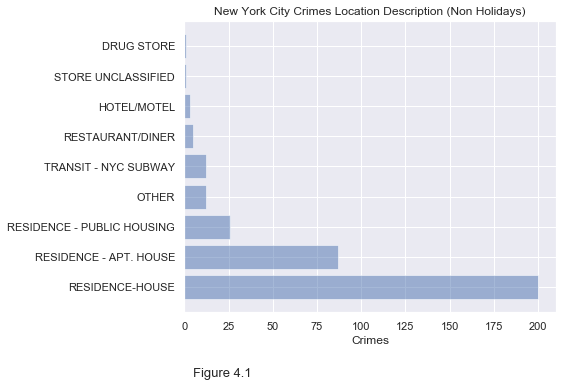

In [27]:
fig = plt.figure(figsize = (8,5))



holiday_crimes =nyc_non_holidays_df[["Latitude", "Longitude"]]


objects = nyc_non_holidays_df["PREM_TYP_DESC"].unique()
y_pos = np.arange(len(objects))
performance = nyc_non_holidays_df["PREM_TYP_DESC"].value_counts()
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Crimes')
plt.title('New York City Crimes Location Description (Non Holidays)')
plt.grid(True)

plt.text(5,-3,"Figure 4.1", fontsize=13)


plt.tight_layout()

plt.show()

fig.savefig("Images/NewYorkNonHolidays.png")

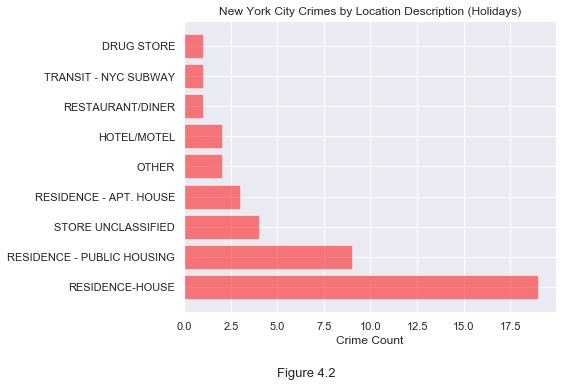

In [28]:
fig = plt.figure(figsize = (8,5))

objects = nyc_holiday_data["PREM_TYP_DESC"].unique()
y_pos = np.arange(len(objects))
performance = nyc_holiday_data["PREM_TYP_DESC"].value_counts()
 
plt.barh(y_pos, performance, align='center', alpha=0.5, color="red")
plt.yticks(y_pos, objects)


plt.xlabel('Crime Count')
plt.title('New York City Crimes by Location Description (Holidays)')
plt.text(5,-3,"Figure 4.2", fontsize=13)

plt.grid(True)

plt.tight_layout()

 
plt.show()



fig.savefig("Images/NewYorkHolidays.png")

* By observing the Crime by Location bar charts, we can conclude that most of the crimes occurred at a residence during both major shopping holidays and non-major shopping holidays. We do not observe a holiday impact on crime location. 

### Reporting Bias

* Zoomed in image of the NYC heat maps shows evidence of reporting bias. Note the NYC Police Dept is location with high crime count. This is likely because the Police departments uses these coordinates when the accurate address is unavailable

In [29]:
locations = nyc_data[["Latitude", "Longitude"]]
fig = gmaps.figure(map_type='SATELLITE',zoom_level = 12, center=(40.8, -73.9),
        layout={
       
        'padding': '3px',
        'border': '1px solid black'}, tilt=45 )
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='3px'))

### NYC Conclusion

* By observing the Crime by Location bar charts, we can conclude that most of the crimes occurred at a residence during both major shopping holidays and non-major shopping holidays. We do not observe a holiday impact on crime location. 

* Neither Chicago nor New York City support that major shopping holidays have an impact on crime location. The location and concentration of crime follow the same trend during both shopping holidays and non shopping holidays for both cities. 